# EDA del Dataset de TMDB 

## 1. Introducción y Objetivos

En este análisis exploratorio de datos (EDA) se investiga el dataset de películas de TMDB. El objetivo principal es descubrir tendencias y los factores que más influyen en el éxito de una película (ingresos, popularidad y valoración). También se exploran aspectos como la evolución del cine, los géneros más populares y mejor valorados.


## 2. Carga y Limpieza de Datos

- Carga del dataset.
- Inspección general de columnas y tipos.
- Limpieza: tratamiento de fechas, listas (géneros), valores nulos.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Cargar el dataset (ajusta el nombre del archivo si es necesario)
df = pd.read_csv('../data/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Inspección y limpieza básica

- Tipos de datos y valores nulos
- Conversión de fechas
- Limpieza de listas (géneros, etc.)


In [32]:
df.info()
print("Recuento de valores nulos por columna:")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

### **Selección de columnas relevantes**

Para centrar el análisis en los aspectos más importantes y evitar que variables irrelevantes contaminen los resultados, seleccionamos únicamente las columnas que aportan valor al estudio de tendencias, géneros y factores de éxito de las películas.

**Columnas seleccionadas:**
- **`budget`**: Presupuesto de la película
- **`genres`**: Géneros asociados
- **`release_date`**: Fecha de estreno
- **`runtime`**: Duración (minutos)
- **`popularity`**: Popularidad (según TMDB)
- **`revenue`**: Ingresos generados
- **`vote_average`**: Valoración media de los usuarios
- **`vote_count`**: Número de votos recibidos
- **`title`**: Título de la película

> De esta forma, trabajamos con un **DataFrame más limpio y enfocado**, lo que facilita tanto la interpretación de los resultados como la visualización de patrones significativos.

In [33]:
# Lista de columnas que te interesan para el análisis
columnas_relevantes = [
    'budget',         # Presupuesto
    'genres',         # Géneros
    'release_date',   # Fecha de estreno
    'runtime',        # Duración
    'popularity',     # Popularidad
    'revenue',        # Ingresos
    'vote_average',   # Valoración media
    'vote_count',     # Número de votos
    'title'           # Título de la película (puedes cambiar por 'original_title' si prefieres)
]

# Dejar solo estas columnas
df = df[columnas_relevantes]
df.head()

,budget,genres,release_date,runtime,popularity,revenue,vote_average,vote_count,title
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2009-12-10,162.0,150.437577,2787965087,7.2,11800,Avatar
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",2007-05-19,169.0,139.082615,961000000,6.9,4500,Pirates of the Caribbean: At World's End
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2015-10-26,148.0,107.376788,880674609,6.3,4466,Spectre
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",2012-07-16,165.0,112.312950,1084939099,7.6,9106,The Dark Knight Rises
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2012-03-07,132.0,43.926995,284139100,6.1,2124,John Carter


### **Limpieza de fechas y géneros**

Para asegurar la calidad de los datos y facilitar el análisis posterior, realizamos dos transformaciones clave:

- **Conversión de fechas:**  
  Transformamos la columna `release_date` al formato de fecha (`datetime`), permitiendo así análisis temporales y detección de valores erróneos o ausentes.

- **Limpieza de géneros:**  
  La columna `genres` viene como un string que representa una lista de diccionarios. La convertimos en una lista de nombres de géneros, lo que facilita el conteo, agrupamiento y visualización por género.

> Estas transformaciones son fundamentales para que las variables temporales y categóricas sean realmente útiles en el análisis exploratorio.

In [34]:
# limpieza de fechas
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
# Limpieza de géneros (de string a lista)
import ast
df['genres'] = df['genres'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)] if pd.notnull(x) else [])

In [35]:
df

,budget,genres,release_date,runtime,popularity,revenue,vote_average,vote_count,title
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",2009-12-10,162.0,150.437577,2787965087,7.2,11800,Avatar
1,300000000,"[Adventure, Fantasy, Action]",2007-05-19,169.0,139.082615,961000000,6.9,4500,Pirates of the Caribbean: At World's End
2,245000000,"[Action, Adventure, Crime]",2015-10-26,148.0,107.376788,880674609,6.3,4466,Spectre
3,250000000,"[Action, Crime, Drama, Thriller]",2012-07-16,165.0,112.312950,1084939099,7.6,9106,The Dark Knight Rises
4,260000000,"[Action, Adventure, Science Fiction]",2012-03-07,132.0,43.926995,284139100,6.1,2124,John Carter
...,...,...,...,...,...,...,...,...,...
4798,220000,"[Action, Crime, Thriller]",1992-09-04,81.0,14.269792,2040920,6.6,238,El Mariachi
4799,9000,"[Comedy, Romance]",2011-12-26,85.0,0.642552,0,5.9,5,Newlyweds
4800,0,"[Comedy, Drama, Romance, TV Movie]",2013-10-13,120.0,1.444476,0,7.0,6,"Signed, Sealed, Delivered"
4801,0,[],2012-05-03,98.0,0.857008,0,5.7,7,Shanghai Calling


## 3. Análisis Exploratorio Univariante

- Distribución de duración, año, popularidad, votos, ingresos.
- Estadísticas descriptivas.
- Conteo y proporción de géneros.


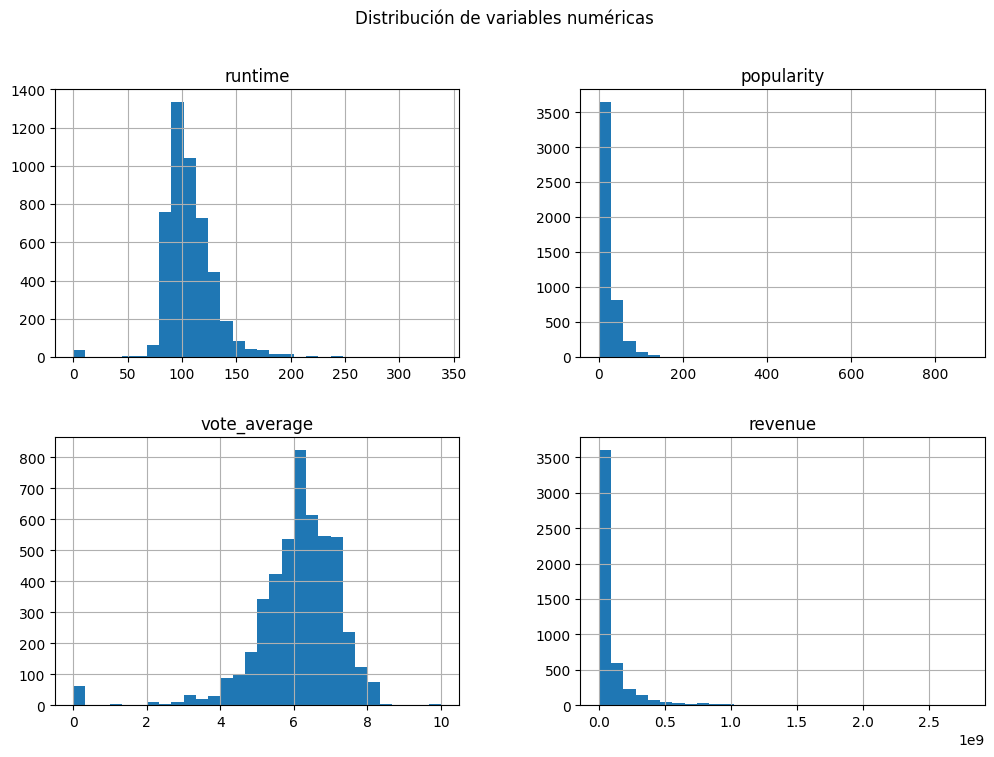

,budget,release_date,runtime,popularity,revenue,vote_average,vote_count
count,4.803000e+03,4802,4801.000000,4803.000000,4.803000e+03,4803.000000,4803.000000
mean,2.904504e+07,2002-12-27 23:45:54.352353280,106.875859,21.492301,8.226064e+07,6.092172,690.217989
min,0.000000e+00,1916-09-04 00:00:00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,7.900000e+05,1999-07-14 00:00:00,94.000000,4.668070,0.000000e+00,5.600000,54.000000
50%,1.500000e+07,2005-10-03 00:00:00,103.000000,12.921594,1.917000e+07,6.200000,235.000000
75%,4.000000e+07,2011-02-16 00:00:00,118.000000,28.313505,9.291719e+07,6.800000,737.000000
max,3.800000e+08,2017-02-03 00:00:00,338.000000,875.581305,2.787965e+09,10.000000,13752.000000
std,4.072239e+07,NaN,22.611935,31.816650,1.628571e+08,1.194612,1234.585891


In [36]:
# Distribuciones
df[['runtime', 'popularity', 'vote_average', 'revenue']].hist(bins=30, figsize=(12,8))
plt.suptitle('Distribución de variables numéricas')
plt.show()

# Estadísticas descriptivas
df.describe()

### **Conclusiones iniciales sobre la distribución de variables numéricas**

- **Duración (`runtime`)**:  
  La mayoría de las películas tienen una duración entre 80 y 140 minutos, con un claro pico alrededor de los 100 minutos. Existen algunos valores atípicos (películas muy cortas o muy largas), pero son poco frecuentes.

- **Popularidad (`popularity`)**:  
  La distribución está fuertemente sesgada a la derecha: la mayoría de las películas tienen valores bajos de popularidad, mientras que solo unas pocas alcanzan valores muy altos.

- **Valoración media (`vote_average`)**:  
  La mayoría de las películas se concentran entre 5 y 7 puntos sobre 10, lo que indica que las valoraciones tienden a ser moderadamente positivas. Hay pocos casos de películas con valoraciones extremadamente bajas o altas.

- **Ingresos (`revenue`)**:  
  La gran mayoría de películas generan ingresos bajos o moderados, mientras que solo unas pocas alcanzan cifras muy elevadas (outliers). Esto sugiere una distribución desigual del éxito económico en el cine.

> **En resumen:**  
> Las variables clave muestran distribuciones sesgadas, con la mayoría de las películas agrupadas en valores bajos o medios y la presencia de algunos outliers. Esto es típico en la industria cinematográfica, donde solo unas pocas películas logran un éxito masivo en ingresos o popularidad, mientras que la mayoría se mantiene en valores más modestos.

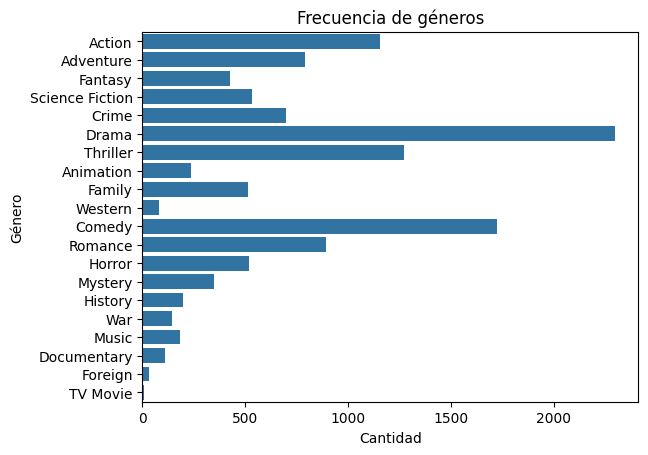

In [37]:
# Conteo de géneros
from collections import Counter
all_genres = [genre for sublist in df['genres'] for genre in sublist]
genre_counts = Counter(all_genres)
sns.barplot(x=list(genre_counts.values()), y=list(genre_counts.keys()))
plt.title('Frecuencia de géneros')
plt.xlabel('Cantidad')
plt.ylabel('Género')
plt.show()

### **Frecuencia de géneros en el cine**

- **Drama** es, con diferencia, el género más frecuente en el dataset, seguido de **Comedy** y **Thriller**. Esto sugiere que las historias dramáticas y cómicas dominan la producción cinematográfica.
- **Action** y **Romance** también son géneros muy representados, reflejando su popularidad tanto en la industria como entre el público.
- Géneros como **Western**, **TV Movie**, **Foreign**, **Documentary**, **Music** y **War** tienen una presencia mucho menor, lo que indica que son nichos o menos producidos en comparación con los anteriores.
- Géneros de animación (**Animation**) y familiares (**Family**) tienen una frecuencia intermedia, probablemente por su público objetivo más específico.
- La diversidad de géneros es amplia, pero la distribución es desigual: unos pocos géneros concentran la mayoría de las películas.

> **Conclusión:**  
> El cine tiende a centrarse en unos pocos géneros principales, con el drama a la cabeza. Esto puede influir en tendencias de éxito, valoración y recaudación, y sugiere que los análisis posteriores por género pueden revelar diferencias interesantes en popularidad, ingresos o valoración media.

## 4. Análisis Exploratorio Bivariante

- Correlaciones entre variables numéricas.
- Valoración e ingresos medios por género.
- Evolución anual: número de películas, duración media, ingresos medios.


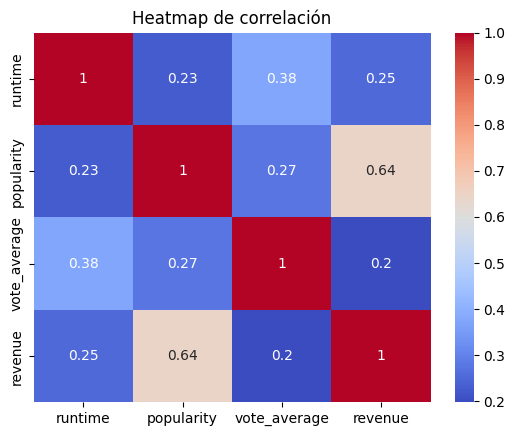

In [38]:
# Correlación
sns.heatmap(df[['runtime', 'popularity', 'vote_average', 'revenue']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de correlación')
plt.show()

### **Conclusiones del heatmap de correlación**

- **Popularidad e ingresos (`popularity` y `revenue`)** muestran la correlación más alta del análisis (0.64), lo que indica que las películas más populares tienden a recaudar más dinero. Sin embargo, la correlación no es perfecta, por lo que hay otros factores en juego.
- **Duración (`runtime`)** tiene correlaciones bajas con el resto de variables, aunque destaca una ligera relación con la valoración media (`vote_average`, 0.38). Esto sugiere que las películas más largas pueden recibir valoraciones algo mejores, pero el efecto es moderado.
- **Valoración media (`vote_average`)** y **ingresos (`revenue`)** apenas están correlacionados (0.20). Es decir, una película con buena valoración no garantiza altos ingresos, y viceversa.
- En general, las correlaciones entre variables numéricas son bajas o moderadas, lo que indica que el éxito de una película (en términos de ingresos) depende de múltiples factores y no solo de su duración, valoración o popularidad.

> **Conclusión:**  
> La popularidad es el mejor predictor simple de ingresos, pero el éxito económico en el cine es multifactorial y no puede explicarse únicamente por las variables analizadas aquí.

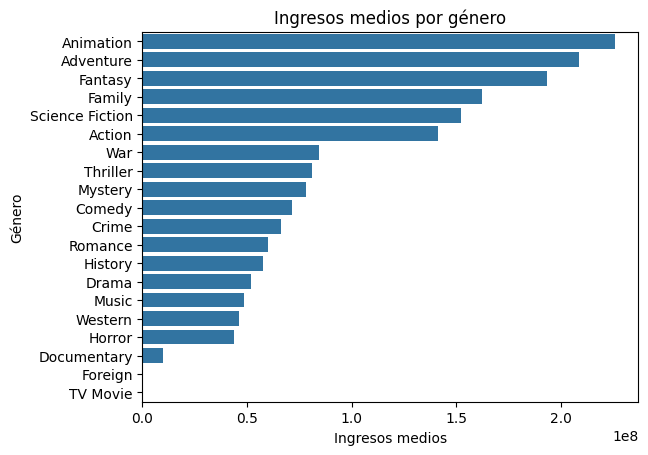

In [39]:
# Valoración e ingresos medios por género
genre_stats = []
for genre in genre_counts.keys():
    mask = df['genres'].apply(lambda x: genre in x)
    genre_stats.append({
        'genre': genre,
        'mean_vote': df[mask]['vote_average'].mean(),
        'mean_revenue': df[mask]['revenue'].mean()
    })
genre_stats_df = pd.DataFrame(genre_stats)
sns.barplot(data=genre_stats_df.sort_values('mean_revenue', ascending=False), x='mean_revenue', y='genre')
plt.title('Ingresos medios por género')
plt.xlabel('Ingresos medios')
plt.ylabel('Género')
plt.show()

### **Ingresos medios por género**

- **Animation, Adventure, Fantasy y Family** son los géneros con mayores ingresos medios. Esto sugiere que las películas orientadas a públicos familiares y de animación suelen tener un gran atractivo comercial, probablemente por su capacidad de atraer tanto a niños como a adultos y por su potencial de merchandising.
- **Science Fiction** y **Action** también destacan por sus elevados ingresos, lo que refleja el éxito de las superproducciones y franquicias dentro de estos géneros.
- Géneros como **War**, **Thriller** y **Mystery** presentan ingresos medios intermedios.
- A pesar de ser los géneros más frecuentes, **Drama** y **Comedy** tienen ingresos medios más bajos, lo que indica que, aunque se producen muchas películas de estos géneros, pocas alcanzan grandes cifras de recaudación.
- Los géneros **Documentary**, **Foreign** y **TV Movie** tienen los ingresos medios más bajos, lo que puede deberse a su menor presupuesto, distribución limitada o nicho de mercado.

> **Conclusión:**  
> El éxito económico en el cine está fuertemente influido por el género. Las películas familiares, de animación, aventuras y fantasía tienden a ser las más rentables, mientras que los dramas y comedias, aunque abundantes, rara vez alcanzan cifras de ingresos tan altas.

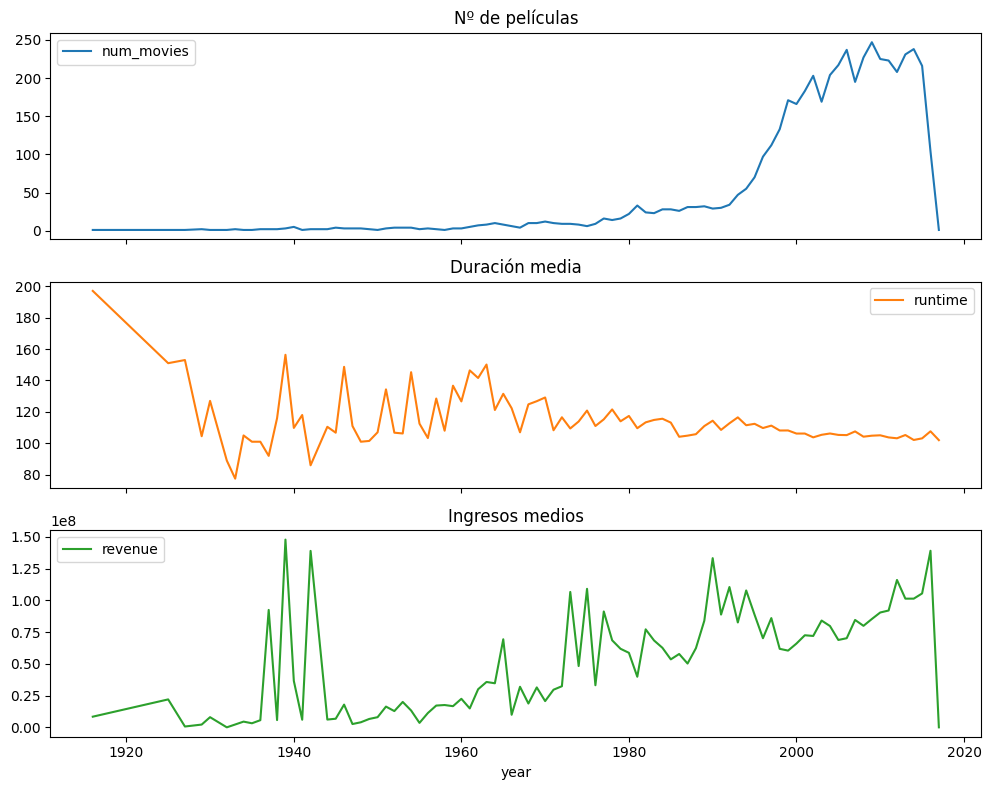

In [40]:
# Evolución anual
df['year'] = df['release_date'].dt.year
annual_stats = df.groupby('year').agg({'title':'count', 'runtime':'mean', 'revenue':'mean'}).rename(columns={'title':'num_movies'})
annual_stats[['num_movies', 'runtime', 'revenue']].plot(subplots=True, figsize=(10,8), title=['Nº de películas', 'Duración media', 'Ingresos medios'])
plt.tight_layout()
plt.show()

### **Evolución anual: número de películas, duración media e ingresos medios**

- **Número de películas:**  
  Se observa un crecimiento sostenido en la producción cinematográfica a lo largo del tiempo, especialmente a partir de los años 1980-1990, alcanzando su punto máximo en la última década. El descenso brusco al final suele deberse a datos incompletos para los años más recientes.

- **Duración media:**  
  La duración media de las películas ha disminuido ligeramente con el tiempo. En las primeras décadas del cine, las películas tendían a ser más largas, pero desde mediados del siglo XX se estabilizan en torno a los 100 minutos.

- **Ingresos medios:**  
  Los ingresos medios muestran una tendencia ascendente, con mucha volatilidad en los primeros años (probablemente por pocos datos y outliers). Desde los años 80-90, los ingresos medios aumentan, reflejando el auge de los blockbusters y la globalización del mercado cinematográfico.

> **Conclusión:**  
> El cine ha experimentado un gran crecimiento en volumen de producción y en ingresos a lo largo del tiempo, mientras que la duración de las películas se ha estabilizado. Los datos recientes pueden estar incompletos, por lo que conviene interpretarlos con cautela.

## 5. Visualizaciones

(Ya incluidas en las secciones anteriores, pero aquí puedes añadir gráficos extra o resúmenes visuales si lo deseas)


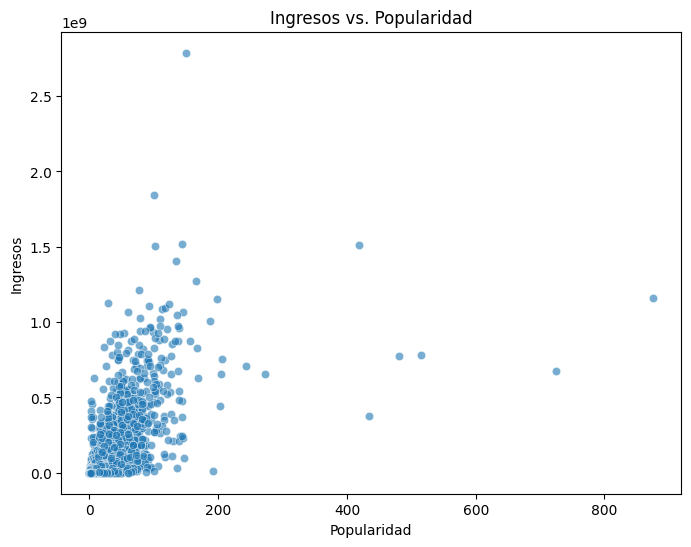

In [41]:
# 1. Scatterplot: Ingresos vs. Popularidad
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='popularity', y='revenue', alpha=0.6)
plt.title('Ingresos vs. Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Ingresos')
plt.show()

### Ingresos vs. Popularidad

- Existe una **tendencia general**: las películas con mayor popularidad suelen alcanzar mayores ingresos, aunque la relación no es perfectamente lineal.
- La mayoría de las películas se agrupan en valores bajos o moderados tanto de popularidad como de ingresos.
- Se observan **outliers** claros: unas pocas películas con popularidad muy alta y/o ingresos extremadamente elevados (blockbusters).
- También hay casos de películas con alta popularidad pero ingresos no tan altos, y viceversa, lo que sugiere que otros factores (como el presupuesto, la distribución o el contexto de estreno) pueden influir en el éxito económico.
- El gráfico confirma la correlación positiva vista en el heatmap, pero también muestra la dispersión y la presencia de muchos valores atípicos.

> **Conclusión:**  
> Aunque la popularidad es un buen indicador del éxito en taquilla, no es el único factor determinante. El éxito económico en el cine es multifactorial y presenta alta variabilidad.

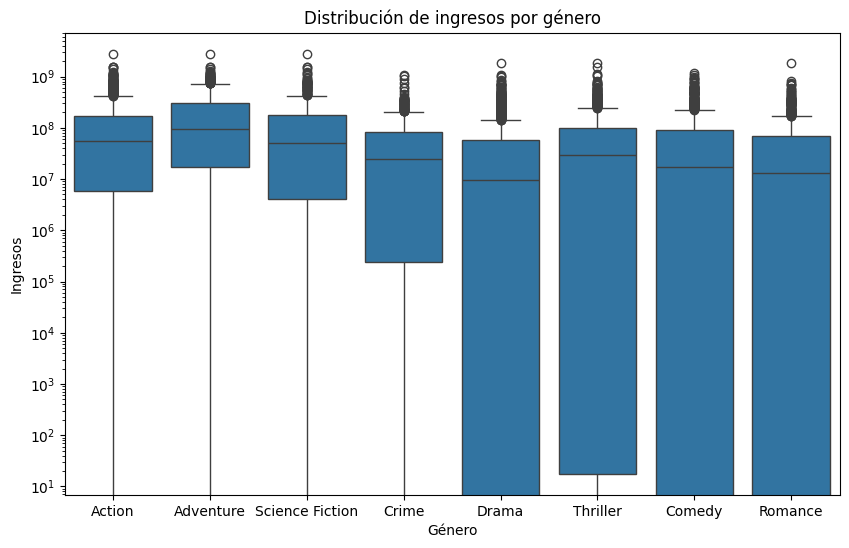

In [42]:
# 2. Boxplot de ingresos por género
# (Solo se muestran los 8 géneros más frecuentes para claridad visual)
from collections import Counter
top_genres = [g for g, _ in Counter([genre for sublist in df['genres'] for genre in sublist]).most_common(8)]
df_exploded = df.explode('genres')
plt.figure(figsize=(10,6))
sns.boxplot(data=df_exploded[df_exploded['genres'].isin(top_genres)], x='genres', y='revenue')
plt.title('Distribución de ingresos por género')
plt.xlabel('Género')
plt.ylabel('Ingresos')
plt.yscale('log')  # Escala logarítmica para visualizar mejor la dispersión
plt.show()


### Distribución de ingresos por género

- Todos los géneros presentan una **gran dispersión** en los ingresos, con muchos valores atípicos (outliers) que corresponden a películas con ingresos excepcionalmente altos.
- La **mediana** de ingresos es similar entre géneros, aunque géneros como **Action**, **Adventure** y **Science Fiction** tienden a mostrar medianas algo más elevadas.
- La escala logarítmica revela que la mayoría de las películas, independientemente del género, obtienen ingresos relativamente bajos, mientras que solo unas pocas alcanzan cifras muy elevadas.
- Géneros como **Drama**, **Comedy** y **Romance** muestran una dispersión amplia, pero sus ingresos más altos no alcanzan los picos de los géneros de acción o aventura.
- El hecho de que todos los géneros tengan tantos outliers indica que el éxito económico extremo es poco frecuente y no exclusivo de un solo género.

> **Conclusión:**  
> Aunque algunos géneros suelen tener ingresos más altos en promedio, el éxito económico extremo puede aparecer en cualquier género, y la mayoría de las películas se mantienen en ingresos bajos o medios.

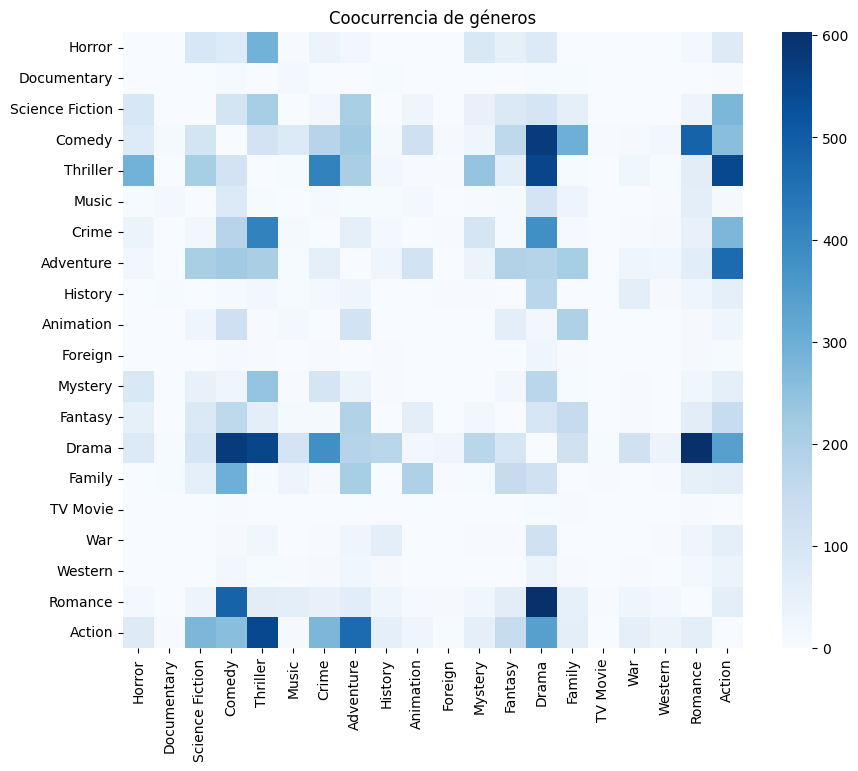

In [43]:
# 3. Mapa de calor de coocurrencia de géneros
import numpy as np
from itertools import combinations
genre_list = list(set([genre for sublist in df['genres'] for genre in sublist]))
cooc_matrix = np.zeros((len(genre_list), len(genre_list)), dtype=int)
for genres in df['genres']:
    for g1, g2 in combinations(genres, 2):
        i, j = genre_list.index(g1), genre_list.index(g2)
        cooc_matrix[i, j] += 1
        cooc_matrix[j, i] += 1
plt.figure(figsize=(10,8))
sns.heatmap(cooc_matrix, xticklabels=genre_list, yticklabels=genre_list, cmap='Blues')
plt.title('Coocurrencia de géneros')
plt.show()

### Coocurrencia de géneros

- Existen combinaciones de géneros que aparecen con mucha frecuencia en las películas, destacando especialmente la asociación entre **Drama**, **Comedy**, **Romance** y **Crime**.
- Géneros como **Action** y **Adventure** también suelen ir de la mano, así como **Science Fiction** con **Action** y **Adventure**.
- Algunos géneros, como **Documentary**, **Foreign** o **TV Movie**, tienden a aparecer de forma más aislada y rara vez se combinan con otros géneros principales.
- El patrón de coocurrencia sugiere que muchas películas buscan atraer a públicos más amplios mezclando géneros populares, mientras que otros géneros se mantienen más “puros” o de nicho.

> **Conclusión:**  
> Las combinaciones de géneros son comunes en la industria cinematográfica y pueden ser una estrategia para maximizar el atractivo comercial de las películas.

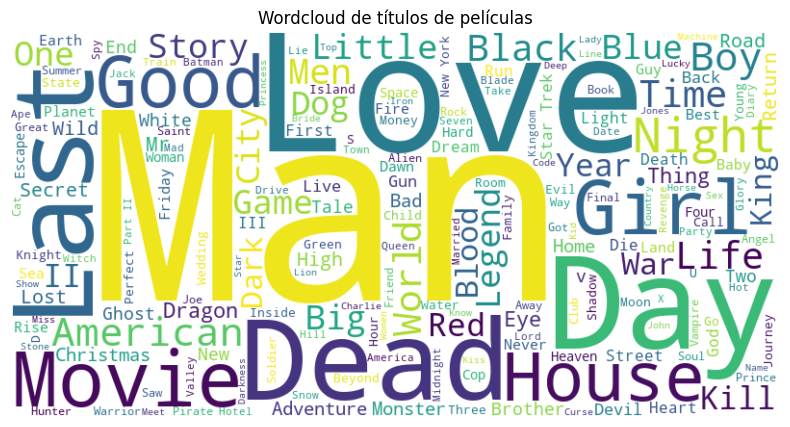

In [44]:
# 5. Wordcloud de títulos (requiere instalar wordcloud)
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(df['title'].dropna())
wordcloud = WordCloud(
    width=800, height=400, background_color='white', stopwords=STOPWORDS
).generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud de títulos de películas')
plt.show()

### Wordcloud de títulos de películas

El wordcloud de títulos es una visualización exploratoria que muestra las palabras más frecuentes en los nombres de las películas del dataset.  
Si bien no aporta insights analíticos directos sobre el éxito, género o ingresos, resulta útil para:

- Identificar de un vistazo tendencias y palabras recurrentes en los títulos.
- Aportar un toque visual atractivo al análisis.
- Explorar curiosidades sobre el naming en la industria cinematográfica.

> **Nota:**  
> Esta visualización es complementaria y no esencial para el análisis de factores de éxito, pero puede enriquecer la presentación y captar la atención en un porfolio o exposición.

## 6. Profundización: Factores de Éxito

- ¿Qué variables predicen mejor el éxito (ingresos)?
- Regresión lineal simple/múltiple o visualización de tendencias.
- Top 10 películas por ingresos y análisis de sus características.


In [45]:
# Regresión lineal simple
import statsmodels.api as sm
X = df[['popularity', 'vote_average', 'runtime']].fillna(0)
y = df['revenue']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     1195.
Date:                Wed, 09 Jul 2025   Prob (F-statistic):               0.00
Time:                        13:58:48   Log-Likelihood:                -96292.
No. Observations:                4803   AIC:                         1.926e+05
Df Residuals:                    4799   BIC:                         1.926e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.124e+07   1.09e+07     -5.628   

### Análisis de regresión lineal: ¿Qué factores influyen en los ingresos?

Para cuantificar el impacto de diferentes variables sobre los ingresos de las películas, hemos ajustado un modelo de regresión lineal múltiple utilizando `statsmodels`.  
El resumen del modelo nos proporciona información clave:

- **R² (R-squared):** El modelo explica aproximadamente el 43% de la variabilidad de los ingresos, lo que indica que las variables elegidas tienen poder explicativo, aunque hay otros factores relevantes fuera del modelo.
- **Popularidad (`popularity`):** Es la variable más influyente y significativa. Un aumento en popularidad está fuertemente asociado a un incremento en los ingresos.
- **Duración (`runtime`):** También tiene un efecto positivo y significativo, aunque menor que la popularidad.
- **Valoración media (`vote_average`):** No resulta significativa en este modelo, lo que sugiere que una mejor valoración no garantiza automáticamente mayores ingresos.
- **Significancia estadística:** Los p-valores permiten identificar qué variables tienen un efecto real y no debido al azar.

> **Conclusión:**  
> La popularidad y la duración son factores importantes para predecir el éxito económico de una película, mientras que la valoración media no muestra un impacto claro en este dataset. El modelo es útil para interpretar tendencias, pero no explica toda la variabilidad de los ingresos, por lo que otros factores externos también influyen.

### Comprobación usando Random Forest

Tras analizar los resultados de la regresión lineal, decidimos probar un modelo de **Random Forest** para predecir los ingresos de las películas.  
Las razones principales son:

- **Captura relaciones no lineales:** El Random Forest puede modelar relaciones complejas y no lineales entre las variables, algo que la regresión lineal no puede hacer.
- **Robustez ante outliers y ruido:** Este modelo es menos sensible a valores extremos y distribuciones sesgadas, que son frecuentes en datos de cine.
- **Importancia de variables:** Permite identificar de forma automática qué variables son más relevantes para la predicción.
- **Mejora potencial del rendimiento:** En la práctica, los modelos de árbol suelen ofrecer mejores resultados predictivos cuando las relaciones entre variables no son puramente lineales.

> **En resumen:**  
> Probar Random Forest nos permite explorar si existe margen de mejora en la predicción de ingresos y descubrir patrones complejos que no serían captados por modelos más simples.

In [47]:
from sklearn.model_selection import train_test_split

# Variables predictoras y objetivo
X = df[['popularity', 'vote_average', 'runtime']].fillna(0)
y = df['revenue']

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Entrenamiento
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicción y evaluación
y_pred = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)

print(f"Random Forest R²: {r2_rf:.3f}")
print(f"Random Forest MSE: {mse_rf:.2e}")

Random Forest R²: 0.547
Random Forest MSE: 1.18e+16


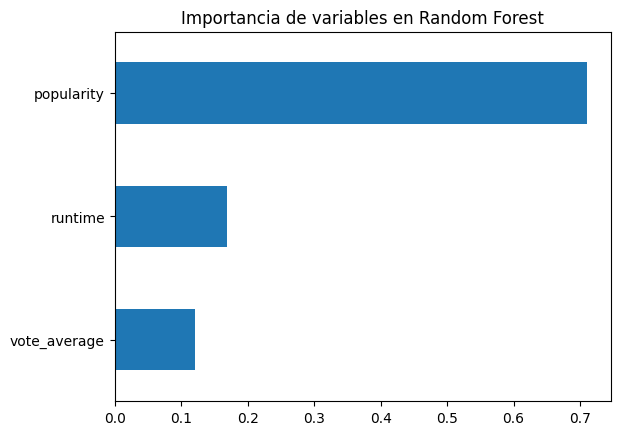

In [20]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')
plt.title('Importancia de variables en Random Forest')
plt.show()

### Conclusiones sobre la importancia de variables en Random Forest

- **Popularidad (`popularity`)** es, con diferencia, la variable más importante para predecir los ingresos de una película según el modelo de Random Forest. Esto confirma lo observado en los análisis anteriores: las películas más populares tienden a recaudar mucho más.
- **Duración (`runtime`)** tiene una importancia intermedia. Aunque su efecto es menor que el de la popularidad, sigue aportando información relevante al modelo.
- **Valoración media (`vote_average`)** es la variable menos influyente de las analizadas. Su impacto en la predicción de ingresos es limitado, lo que sugiere que una buena valoración no siempre se traduce en éxito económico.

> **Conclusión:**  
> El modelo de Random Forest refuerza la idea de que la popularidad es el factor clave para el éxito en taquilla, mientras que la duración y la valoración juegan un papel secundario. Estos resultados pueden ayudar a orientar futuras estrategias de marketing o producción en la industria cinematográfica.

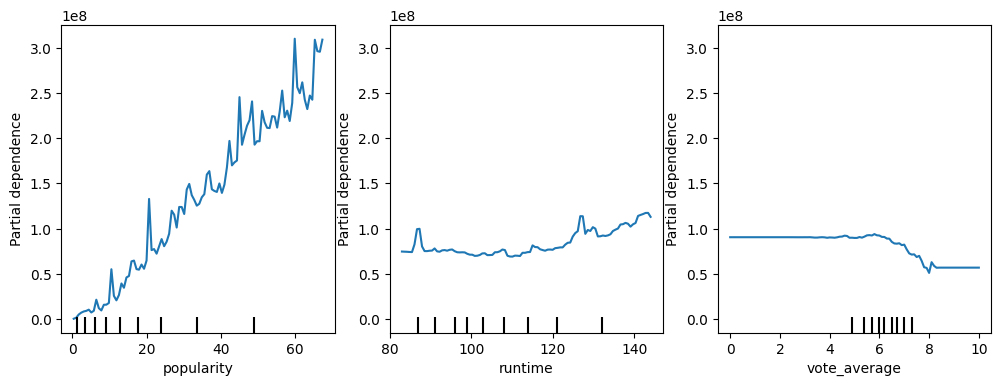

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

features = ['popularity', 'runtime', 'vote_average']
fig, ax = plt.subplots(1, 3, figsize=(12, 4)) 
PartialDependenceDisplay.from_estimator(rf, X, features, ax=ax)
plt.show()

### Conclusiones de los gráficos de dependencia parcial

- **Popularidad (`popularity`):**
  - Existe una relación claramente creciente y no lineal: a mayor popularidad, mayor predicción de ingresos.
  - El efecto se acelera para valores altos de popularidad, lo que indica que las películas muy populares pueden alcanzar ingresos excepcionalmente altos.

- **Duración (`runtime`):**
  - La influencia de la duración sobre los ingresos es más débil y presenta cierta variabilidad.
  - Las películas con duración entre 100 y 140 minutos tienden a tener ingresos algo superiores, pero la relación no es tan marcada ni lineal como en el caso de la popularidad.

- **Valoración media (`vote_average`):**
  - El efecto de la valoración media sobre los ingresos es prácticamente plano

In [22]:
# Top 10 películas por ingresos
top10 = df.sort_values('revenue', ascending=False).head(10)
top10[['title', 'genres', 'revenue', 'popularity', 'vote_average', 'runtime', 'release_date']]

,title,genres,revenue,popularity,vote_average,runtime,release_date
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",2787965087,150.437577,7.2,162.0,2009-12-10
25,Titanic,"[Drama, Romance, Thriller]",1845034188,100.025899,7.5,194.0,1997-11-18
16,The Avengers,"[Science Fiction, Action, Adventure]",1519557910,144.448633,7.4,143.0,2012-04-25
28,Jurassic World,"[Action, Adventure, Science Fiction, Thriller]",1513528810,418.708552,6.5,124.0,2015-06-09
44,Furious 7,[Action],1506249360,102.322217,7.3,137.0,2015-04-01
7,Avengers: Age of Ultron,"[Action, Adventure, Science Fiction]",1405403694,134.279229,7.3,141.0,2015-04-22
124,Frozen,"[Animation, Adventure, Family]",1274219009,165.125366,7.3,102.0,2013-11-27
31,Iron Man 3,"[Action, Adventure, Science Fiction]",1215439994,77.682080,6.8,130.0,2013-04-18
546,Minions,"[Family, Animation, Adventure, Comedy]",1156730962,875.581305,6.4,91.0,2015-06-17
26,Captain America: Civil War,"[Adventure, Action, Science Fiction]",1153304495,198.372395,7.1,147.0,2016-04-27


### Top 10 películas por ingresos

- Las películas más taquilleras suelen pertenecer a los géneros **acción**, **aventura**, **ciencia ficción** y, en menor medida, **animación** y **comedia**.
- Muchas de ellas forman parte de franquicias o sagas exitosas, como *Avatar*, *The Avengers*, *Jurassic World* o *Furious 7*.
- La popularidad de estas películas es muy elevada, lo que refuerza la relación observada entre popularidad e ingresos.
- La valoración media (`vote_average`) de estas películas es buena, pero no necesariamente la más alta del dataset, lo que confirma que el éxito económico no siempre va de la mano de la mejor valoración.
- La duración de las películas top suele ser superior a la media, situándose entre 90 y 190 minutos.
- La presencia de películas de animación como *Frozen* y *Minions* muestra que el cine familiar también puede alcanzar cifras récord de recaudación.

> **Conclusión:**  
> El éxito en taquilla está fuertemente vinculado a la popularidad, pertenencia a franquicias y géneros de acción, aventura o animación, más que a una valoración excepcional por parte del público.

## Resumen ejecutivo y conclusiones finales

Este análisis exploratorio del dataset de TMDB ha permitido identificar los principales factores asociados al éxito económico de las películas, así como tendencias y patrones relevantes en la industria cinematográfica.

**Principales hallazgos:**
- **Popularidad:** Es el predictor más fuerte de ingresos, tanto en modelos lineales como de machine learning. Las películas más populares tienden a recaudar mucho más.
- **Género:** Los géneros de acción, aventura, ciencia ficción y animación dominan el ranking de películas más taquilleras. El cine familiar y de franquicias es especialmente rentable.
- **Duración:** Las películas de mayor éxito suelen tener una duración superior a la media, aunque este factor tiene menos peso que la popularidad.
- **Valoración:** Una buena valoración media no garantiza altos ingresos. El éxito comercial y la crítica no siempre van de la mano.
- **Modelos predictivos:** El uso de Random Forest mejora la capacidad de predicción sobre la regresión lineal, captando relaciones no lineales y complejas entre las variables.

**Recomendaciones y reflexiones:**
- Para maximizar el éxito en taquilla, la estrategia debería centrarse en aumentar la popularidad y apostar por géneros y formatos con mayor atractivo comercial.
- El análisis puede mejorarse incluyendo más variables (presupuesto, marketing, países, etc.) y probando técnicas de modelado avanzadas.
- El EDA demuestra la importancia de combinar estadística clásica y machine learning para obtener una visión completa y accionable de los datos.

> **En definitiva:**  
> El éxito en la industria del cine es multifactorial, pero la popularidad y el género son claves para alcanzar cifras de ingresos extraordinarias. Este análisis proporciona una base sólida para futuras investigaciones o recomendaciones de negocio en el sector audiovisual.